# Medical Imaging and Binary Classification Model

### ***Import libraries***

In [55]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### ***Load the images***

In [56]:
# define  directories for the brain MRIs for each class
# not tumor
class_0_dir = 'data/no'

# has tumor
class_1_dir = 'data/yes'

In [57]:
# create a function to load and preprocess images
def load_images_from_dir(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.JPG'):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))
            img = img / 255.0
            images.append(img)
            labels.append(label)
    return images, labels

In [58]:
# for each directory, load and preprocess the images
class_0_images, class_0_labels = load_images_from_dir(class_0_dir, 0)
class_1_images, class_1_labels = load_images_from_dir(class_1_dir, 1)

In [59]:
# combine the images
images = np.array(class_0_images + class_1_images)

# combine the labels
labels = np.array(class_0_labels + class_1_labels)

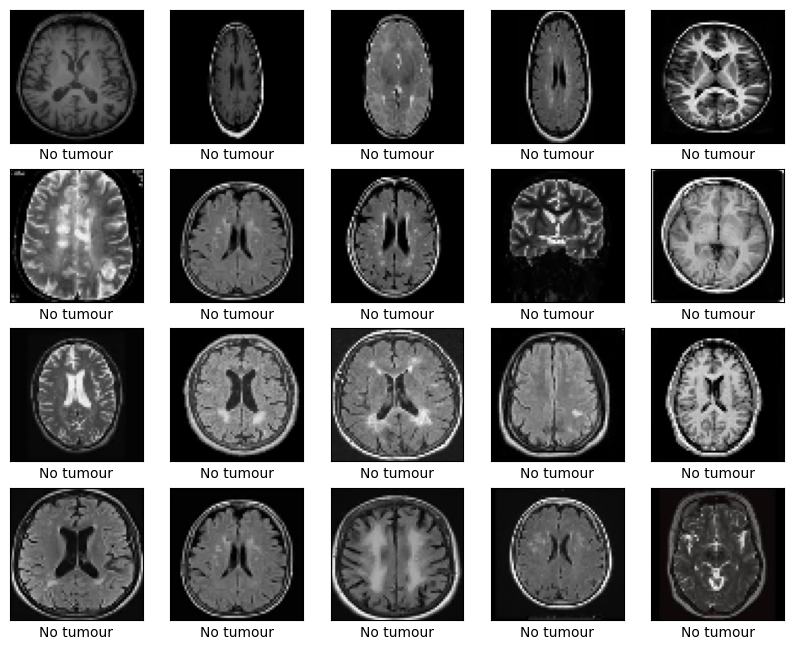

In [60]:
# set class names
class_names = ['No tumour', 'Tumour']

# plot the images
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(class_names[labels[i]])
plt.show()

In [61]:
# split data into: training, validation, test sets
# 20% for testing; 80% for training
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [62]:
# display the shapes
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (156, 64, 64, 3)
Train labels shape: (156,)
Validation images shape: (39, 64, 64, 3)
Validation labels shape: (39,)
Test images shape: (49, 64, 64, 3)
Test labels shape: (49,)


In [63]:
# import more libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [64]:
# initialise a sequential model -> to build the neural network layers
model = models.Sequential()

# add the 1st convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))

# add a max-pooling layer after the 1st convolutional layer
model.add(layers.MaxPooling2D((2, 2)))

# add the 2nd convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# add a max-pooling layer after the 2nd convolutional layer
model.add(layers.MaxPooling2D((2, 2)))

# add the 3rd convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [65]:
# display summary of the model architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# add flattening layer to the model
model.add(layers.Flatten())

# add dense layer - with 64 units/neurons; uses the ReLU activation function
# dense layer = fully connected layer
model.add(layers.Dense(64, activation='relu'))

# add a dense later - with 2 units/neurons
model.add(layers.Dense(2))

In [67]:
# display summary of the model architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,338 (2.47 MB)

 Trainable params: 646,338 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# compile the model
model.compile(optimizer='adam', # use Adam for optimisation
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # as a metric, track accuracy during model training

# train the model
history = model.fit(train_images, train_labels, epochs=10, # training for 10 epochs
                    validation_data=(test_images, test_labels)) # use test images and labels for validation

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.6741 - loss: 0.6929 - val_accuracy: 0.6735 - val_loss: 0.6590
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7362 - loss: 0.6198 - val_accuracy: 0.7347 - val_loss: 0.5449
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7430 - loss: 0.5072 - val_accuracy: 0.7143 - val_loss: 0.5264
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.7854 - loss: 0.4884 - val_accuracy: 0.7347 - val_loss: 0.4986
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.8092 - loss: 0.4349 - val_accuracy: 0.7755 - val_loss: 0.5214
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7950 - loss: 0.4548 - val_accuracy: 0.7755 - val_loss: 0.4906
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.8229 - loss: 0.3665 - val_accuracy: 0.7755 - val_loss: 0.4719
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8252 - loss: 0.3266 - val_accuracy: 0.7959 - val_loss: 0.

2/2 - 0s - 45ms/step - accuracy: 0.7755 - loss: 0.4170


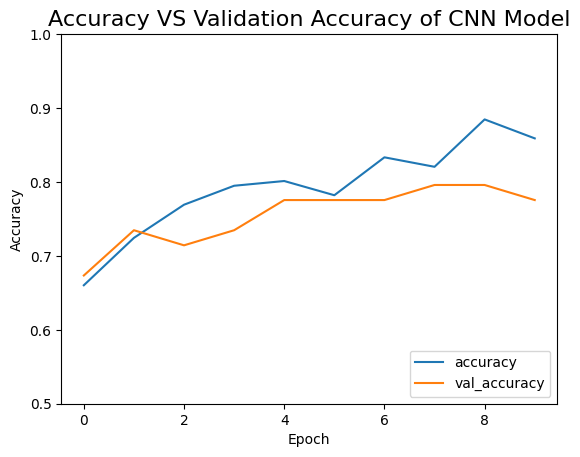

In [69]:
# plot the accuracy and validation accuracy over the 10 epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

# plot details
plt.title('Accuracy VS Validation Accuracy of CNN Model', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [70]:
# save model weights as HDF5
model.save("model/brain-tumor-classification-cnn_model.keras")

### ***To test a trained model on single images***

In [71]:
# import more libraries
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [72]:
# Step 1: Preprocess the Image
# create a function to preprocess the image
def preprocess_image(image_path):
    # load the image
    img = cv2.imread(image_path)
    plt.imshow(img)
    # resize to match the input images
    img = cv2.resize(img, (64, 64))
    # convert to match
    img = img / 255.0
    # reshape to match the input shape
    img = img.reshape((1,64, 64, 3))
    return img

In [73]:
# Step 2: Load the Model
model = tf.keras.models.load_model('model/brain-tumor-classification-cnn_model.keras')

# display input shape of the now loaded model
print(model.input_shape)

(None, 64, 64, 3)


In [74]:
# Step 3: Make Predictions
# create a function to make predictions the image using the model
def test_single_image(image_path, model):
    img = preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)
    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted Class: 1


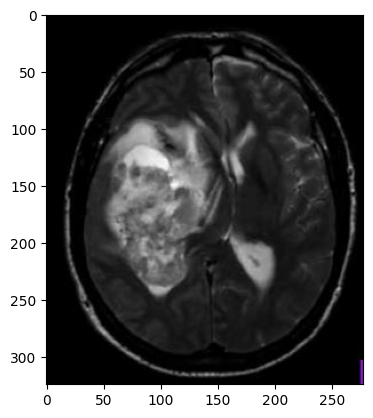

In [75]:
# Test the model on a single image
# find image path
image_path = 'data/test image/Y259.JPG'

# make predictions of the image using the training model
predicted_class = test_single_image(image_path, model)

# display the predicted class label of the image
print('Predicted Class:', predicted_class)